# Feed Forward Neural Network on Fashion MNIST
---
Don't forget to use **https://pytorch.org/docs/stable/**

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import torch

## Prepare Fashion MNIST dataset
We want to preprocess training data, specifically to have flatten shape `(28, 28) -> 784` in `torch.Tensor` format.

In [3]:
from torchvision.datasets import FashionMNIST
from torchvision.transforms import ToTensor, Compose
from torch.utils.data import DataLoader

In [4]:
class ReshapeTransform:
    def __init__(self, new_size=(-1,)):
        self.new_size = new_size

    def __call__(self, sample):
        return torch.reshape(sample, self.new_size)

In [5]:
transformations = Compose([ToTensor(), ReshapeTransform()])

In [6]:
train_dataset = FashionMNIST('fm_data/', download=True, train=True, transform=transformations, target_transform=None)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

test_dataset = FashionMNIST('fm_data/', download=True, train=False, transform=transformations, target_transform=None)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

In [7]:
train_dataset[0]

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000,
         0.0510, 0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0039, 0.0

In [8]:
next(iter(train_loader))

[tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 tensor([4, 6, 3, 5, 5, 6, 8, 0, 5, 8, 4, 5, 0, 9, 8, 4, 5, 3, 4, 0, 0, 2, 4, 5,
         7, 1, 5, 2, 2, 1, 9, 8, 8, 9, 8, 9, 6, 5, 7, 8, 7, 8, 7, 9, 1, 5, 4, 1,
         9, 1, 5, 4, 7, 5, 3, 5, 1, 0, 8, 5, 0, 7, 3, 9])]

## Define neural network
In case we use `torch.nn` modules, we don't need to register tensor with `torch.nn.Parameter`. Don't forget to setup `.eval()` or `.train()` modes for model to enforce proper behaviour of certain layers as `torch.nn.Dropout`.

In [9]:
from torch.nn import Module
from torch.nn import ReLU, Tanh, Dropout, Softmax, Linear, BatchNorm1d
from torch.nn import MSELoss, CrossEntropyLoss
from torch.optim import Adam, SGD
from torch.nn.init import xavier_uniform_, normal_

In [10]:
class FeedForwardNeuralNet(torch.nn.Module):
    def __init__(self):
        super(FeedForwardNeuralNet, self).__init__()
        
        self.layer_1 = Linear(784, 64)
        self.layer_2 = Linear(64, 10)
        xavier_uniform_(self.layer_1.weight)
        
        self.batch_norm_layer_1 = BatchNorm1d(64)
        self.dropout = Dropout(p=0.1)

        
    def forward(self, input_batch):
        prediction = self.layer_1(input_batch)
        prediction = torch.relu(prediction)
        prediction = self.batch_norm_layer_1(prediction)
        prediction = self.dropout(prediction)
        prediction = self.layer_2(prediction)
        return torch.softmax(prediction, dim=1)
        # return torch.log_softmax(prediction, dim=1) -> torch.exp(prediction)

In [11]:
feed_forward_neural_net = FeedForwardNeuralNet()

In [12]:
feed_forward_neural_net

FeedForwardNeuralNet(
  (layer_1): Linear(in_features=784, out_features=64, bias=True)
  (layer_2): Linear(in_features=64, out_features=10, bias=True)
  (batch_norm_layer_1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout): Dropout(p=0.1)
)

In [15]:
feed_forward_neural_net.state_dict()

[Parameter containing:
 tensor([[-0.0551,  0.0158, -0.0689,  ..., -0.0604,  0.0454, -0.0156],
         [ 0.0625, -0.0825,  0.0263,  ...,  0.0337, -0.0090,  0.0189],
         [-0.0356,  0.0735,  0.0704,  ...,  0.0737, -0.0316,  0.0208],
         ...,
         [ 0.0593,  0.0240, -0.0841,  ...,  0.0624,  0.0014, -0.0208],
         [-0.0424,  0.0540,  0.0602,  ..., -0.0491, -0.0200,  0.0245],
         [-0.0598,  0.0612,  0.0156,  ...,  0.0694,  0.0650, -0.0040]],
        requires_grad=True), Parameter containing:
 tensor([ 0.0335, -0.0006,  0.0298, -0.0031,  0.0269,  0.0243,  0.0287,  0.0103,
         -0.0233, -0.0213,  0.0244, -0.0066,  0.0180, -0.0064, -0.0213,  0.0336,
         -0.0345,  0.0271,  0.0333, -0.0316, -0.0324, -0.0189, -0.0327,  0.0056,
          0.0013, -0.0213, -0.0160, -0.0235,  0.0306, -0.0158, -0.0141, -0.0295,
          0.0229,  0.0091,  0.0232,  0.0176, -0.0190, -0.0352,  0.0195, -0.0235,
         -0.0248,  0.0205,  0.0072, -0.0010, -0.0144,  0.0066,  0.0269, -0.0341,

In [8]:
images, labels = next(iter(test_loader))

In [19]:
feed_forward_neural_net.eval()
predictions = feed_forward_neural_net(images)
feed_forward_neural_net.train()
predictions[:4]

tensor([[0.0826, 0.1065, 0.1055, 0.1051, 0.1238, 0.0857, 0.0993, 0.0957, 0.1082,
         0.0877],
        [0.0670, 0.0910, 0.1217, 0.1133, 0.1109, 0.0860, 0.1038, 0.1119, 0.1132,
         0.0811],
        [0.0777, 0.0844, 0.1207, 0.0947, 0.1460, 0.0873, 0.1045, 0.1236, 0.0883,
         0.0728],
        [0.0811, 0.0797, 0.1253, 0.1064, 0.1313, 0.0947, 0.1062, 0.1094, 0.0937,
         0.0723]], grad_fn=<SliceBackward>)

## Define optimizers and loss function

In [24]:
loss_fce = CrossEntropyLoss()
loss_fce

CrossEntropyLoss()

In [21]:
loss_fce(predictions, labels)

tensor(2.3021, grad_fn=<NllLossBackward>)

In [23]:
#optimizer = SGD(feed_forward_neural_net.parameters(), lr=0.1)
optimizer = Adam(feed_forward_neural_net.parameters())
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
)

## Train neural net

In [25]:
from collections import deque
import numpy as np
import matplotlib.pyplot as plt

In [32]:
def get_test_acc_and_loss(feed_forward_neural_net, loss_fce, test_loader):
    accuracy = 0
    loss = 0
    
    feed_forward_neural_net.eval()
    for images, labels in test_loader:
        predictions = feed_forward_neural_net(images)
        accuracy += (predictions.argmax(dim=1) == labels).type(torch.FloatTensor).mean().item() 
        loss += loss_fce(predictions, labels).item()
        
    return accuracy / len(test_loader) * 100, loss / len(test_loader)

In [33]:
get_test_acc_and_loss(feed_forward_neural_net, loss_fce, test_loader)

(84.30533439490446, 1.6256125755370803)

In [29]:
# Initial params setup.
epochs = 2
batch_iteration = 0
report_period = 100

# Storing of some data.
train_leak_loss = deque(maxlen=report_period)
train_loss_history = []
test_loss_history = []
test_acc_history = []

In [30]:
for epoch in range(epochs):
    
    # Setup net to train mode and go through one epoch.
    feed_forward_neural_net.train()
    for images, labels in train_loader:
        batch_iteration += 1
        
        # Training net on one batch.
        optimizer.zero_grad()
        predictions = feed_forward_neural_net.forward(images)
        loss = loss_fce(predictions, labels)
        loss.backward()
        optimizer.step()
        
        train_leak_loss.append(loss.item())
        
        # In case we should report, lets make validation on test set.
        if batch_iteration % report_period == 0:
            feed_forward_neural_net.eval()
            # We don't want to collect info for gradients from here.
            with torch.no_grad():
                test_accuracy, test_loss = get_test_acc_and_loss(feed_forward_neural_net, loss_fce, test_loader)
                
            print(f'Epoch: {epoch+1}/{epochs}.. ',
                  f"Train Loss: {round(np.mean(train_leak_loss), 2)}.. ",
                  f"Test Loss: {round(test_loss, 2)}.. ",
                  f"Test Acc: {round(test_accuracy, 2)}%")
            
            train_loss_history.append(np.mean(train_leak_loss))
            test_loss_history.append(test_loss)
            test_acc_history.append(test_accuracy)
                        
            feed_forward_neural_net.train()

Epoch: 1/2..  Train Loss: 2.01..  Test Loss: 1.83..  Test Acc: 75.67%
Epoch: 1/2..  Train Loss: 1.76..  Test Loss: 1.72..  Test Acc: 79.63%
Epoch: 1/2..  Train Loss: 1.69..  Test Loss: 1.68..  Test Acc: 81.38%
Epoch: 1/2..  Train Loss: 1.67..  Test Loss: 1.66..  Test Acc: 82.05%
Epoch: 1/2..  Train Loss: 1.65..  Test Loss: 1.66..  Test Acc: 81.68%
Epoch: 1/2..  Train Loss: 1.65..  Test Loss: 1.65..  Test Acc: 83.28%
Epoch: 1/2..  Train Loss: 1.63..  Test Loss: 1.64..  Test Acc: 82.88%
Epoch: 1/2..  Train Loss: 1.63..  Test Loss: 1.64..  Test Acc: 83.5%
Epoch: 1/2..  Train Loss: 1.64..  Test Loss: 1.65..  Test Acc: 82.5%
Epoch: 2/2..  Train Loss: 1.62..  Test Loss: 1.64..  Test Acc: 83.2%
Epoch: 2/2..  Train Loss: 1.63..  Test Loss: 1.64..  Test Acc: 83.34%
Epoch: 2/2..  Train Loss: 1.63..  Test Loss: 1.63..  Test Acc: 84.22%
Epoch: 2/2..  Train Loss: 1.62..  Test Loss: 1.63..  Test Acc: 83.92%
Epoch: 2/2..  Train Loss: 1.63..  Test Loss: 1.63..  Test Acc: 84.53%
Epoch: 2/2..  Train Los

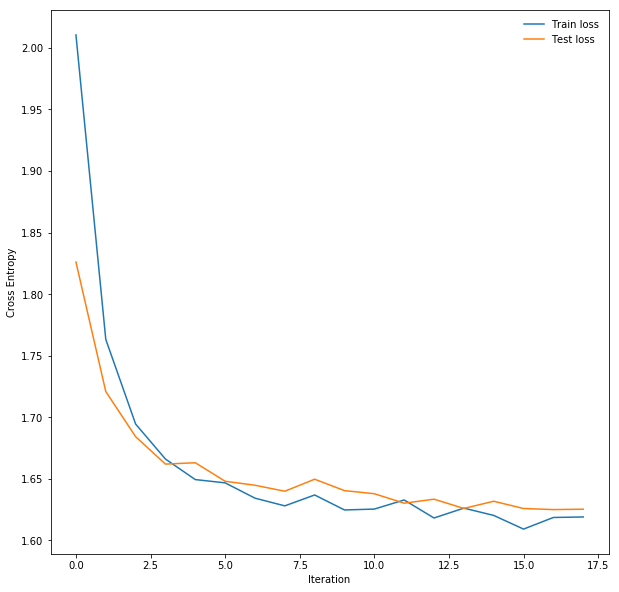

In [35]:
fig = plt.figure(figsize=(10, 10))
ax = plt.gca()
ax.set_xlabel('Iteration')
ax.set_ylabel('Cross Entropy')
plt.plot(train_loss_history, label='Train loss')
plt.plot(test_loss_history, label='Test loss')
plt.legend(frameon=False)

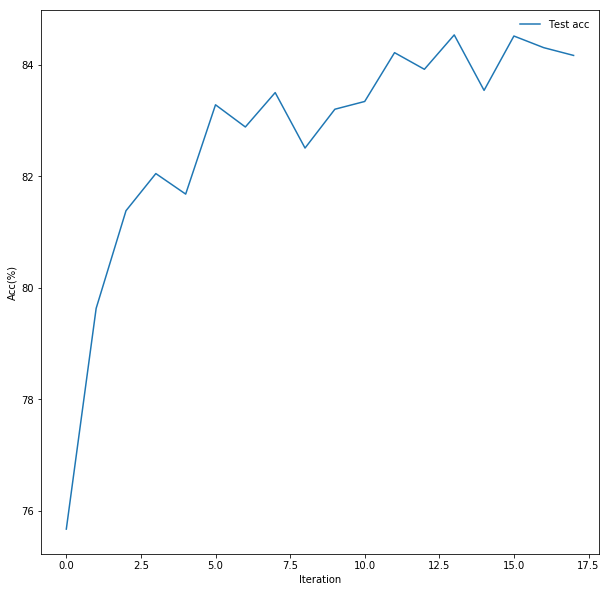

In [38]:
fig = plt.figure(figsize=(10, 10))
plt.plot(test_acc_history, label='Test acc')
ax = plt.gca()
ax.set_xlabel('Iteration')
ax.set_ylabel('Acc(%)')
plt.legend(frameon=False)

## Results evaluation

In [ ]:
feed_forward_neural_net.eval()

In [10]:
test_dataset[12][0].shape

torch.Size([784])

### View single images and predictions

In [9]:
from image_processing_workshop.visual import plot_classify, plot_image

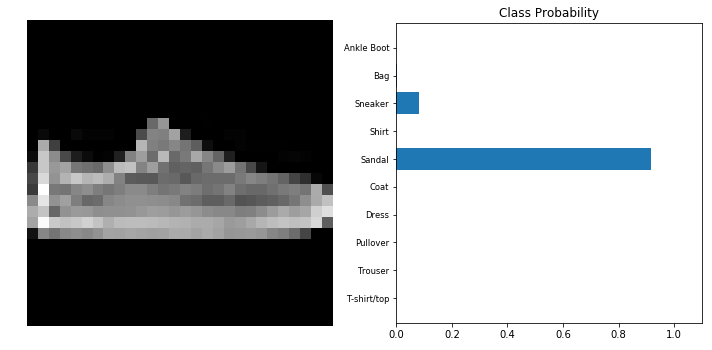

In [40]:
plot_classify(test_dataset[12][0], feed_forward_neural_net)

### Load reuslts to pandas df

In [41]:
from image_processing_workshop.eval import get_results_df
from image_processing_workshop.visual import plot_df_examples

In [42]:
df = get_results_df(feed_forward_neural_net, test_loader)
df.head(10)

,label_class_name,label_class_score,predicted_class_name_top1,predicted_class_score_top1,image
0,Ankle boot,0.888014,Ankle boot,0.888014,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1,Pullover,0.999982,Pullover,0.999982,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2,Trouser,0.999908,Trouser,0.999908,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00..."
3,Trouser,0.999253,Trouser,0.999253,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4,Shirt,0.994987,Shirt,0.994987,"[[0.0, 0.0, 0.0, 0.007843137718737125, 0.0, 0...."
5,Trouser,0.999412,Trouser,0.999412,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
6,Coat,1.000000,Coat,1.000000,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00..."
7,Shirt,0.963634,Shirt,0.963634,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00..."
8,Sandal,0.999977,Sandal,0.999977,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
9,Sneaker,0.999976,Sneaker,0.999976,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


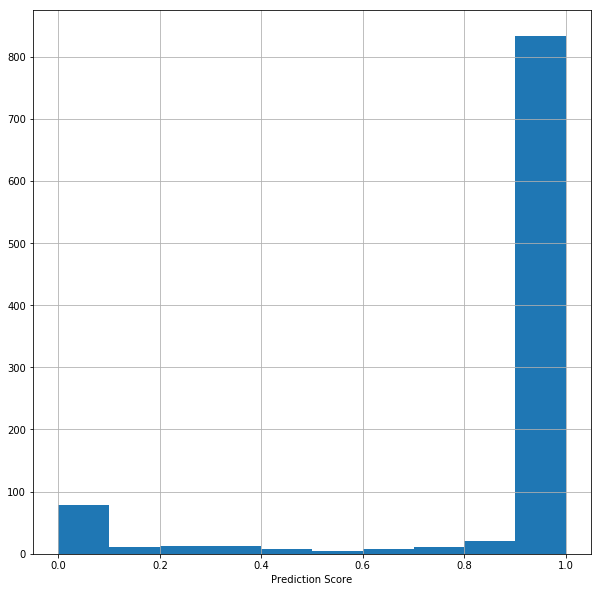

In [45]:
fig = plt.figure(figsize=(10, 10))
ax = plt.gca()
ax.set_xlabel('Prediction Score')
df[df.label_class_name=='Dress'].label_class_score.hist(ax=ax)

In [ ]:
plot_df_examples(df.iloc[:25])

### Precision

In [47]:
from image_processing_workshop.eval import get_precision

In [48]:
get_precision(df, 'Dress')

78.51

### Recall

In [49]:
from image_processing_workshop.eval import get_recall

In [50]:
get_recall(df, 'Dress')

88.4

### Overall Recall and Precision

In [51]:
from image_processing_workshop.eval import get_rec_prec

In [52]:
get_rec_prec(df)

,class_name,recall,precision
0,T-shirt/top,85.3,78.19
1,Trouser,93.9,99.16
2,Pullover,81.5,68.14
3,Dress,88.4,78.51
4,Coat,76.7,72.02
5,Sandal,92.9,94.60
6,Shirt,41.9,74.96
7,Sneaker,94.1,90.13
8,Bag,95.1,94.63
9,Ankle boot,93.1,94.52


### Accuracy

In [53]:
from image_processing_workshop.eval import get_accuracy

In [54]:
get_accuracy(df)

84.29

### False Positives

In [55]:
from image_processing_workshop.eval import get_false_positives

In [56]:
fp = get_false_positives(df, label_class_name='Shirt')

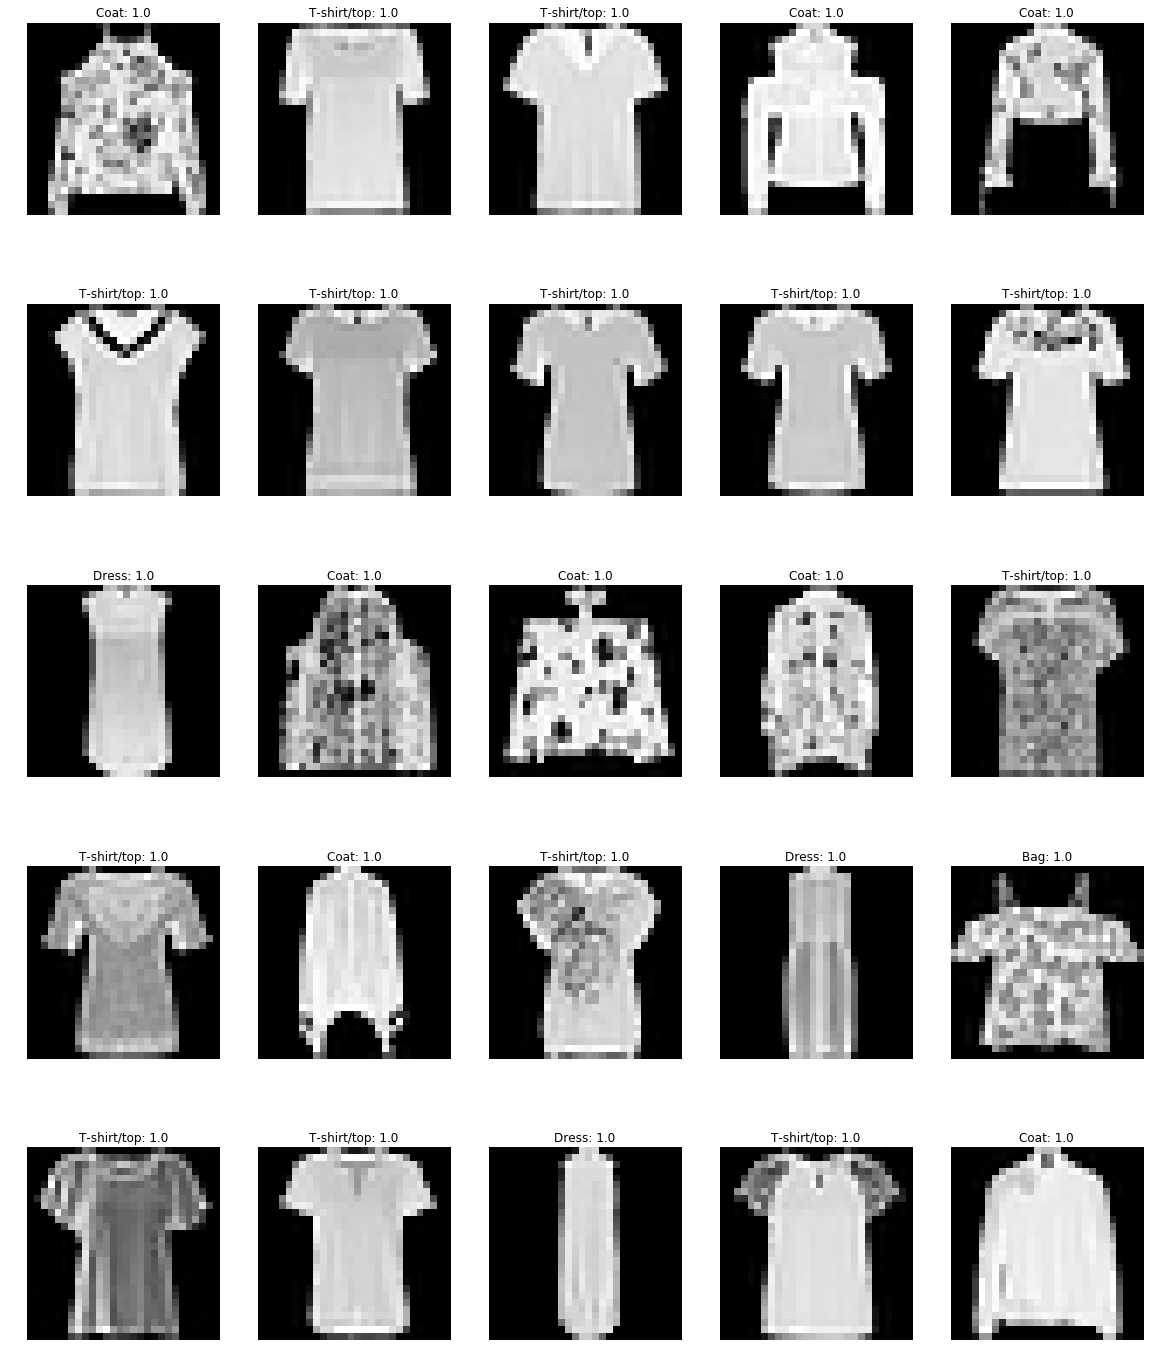

In [57]:
plot_df_examples(fp)

In [58]:
fp = get_false_positives(df, label_class_name='Shirt', predicted_class_name='Pullover')

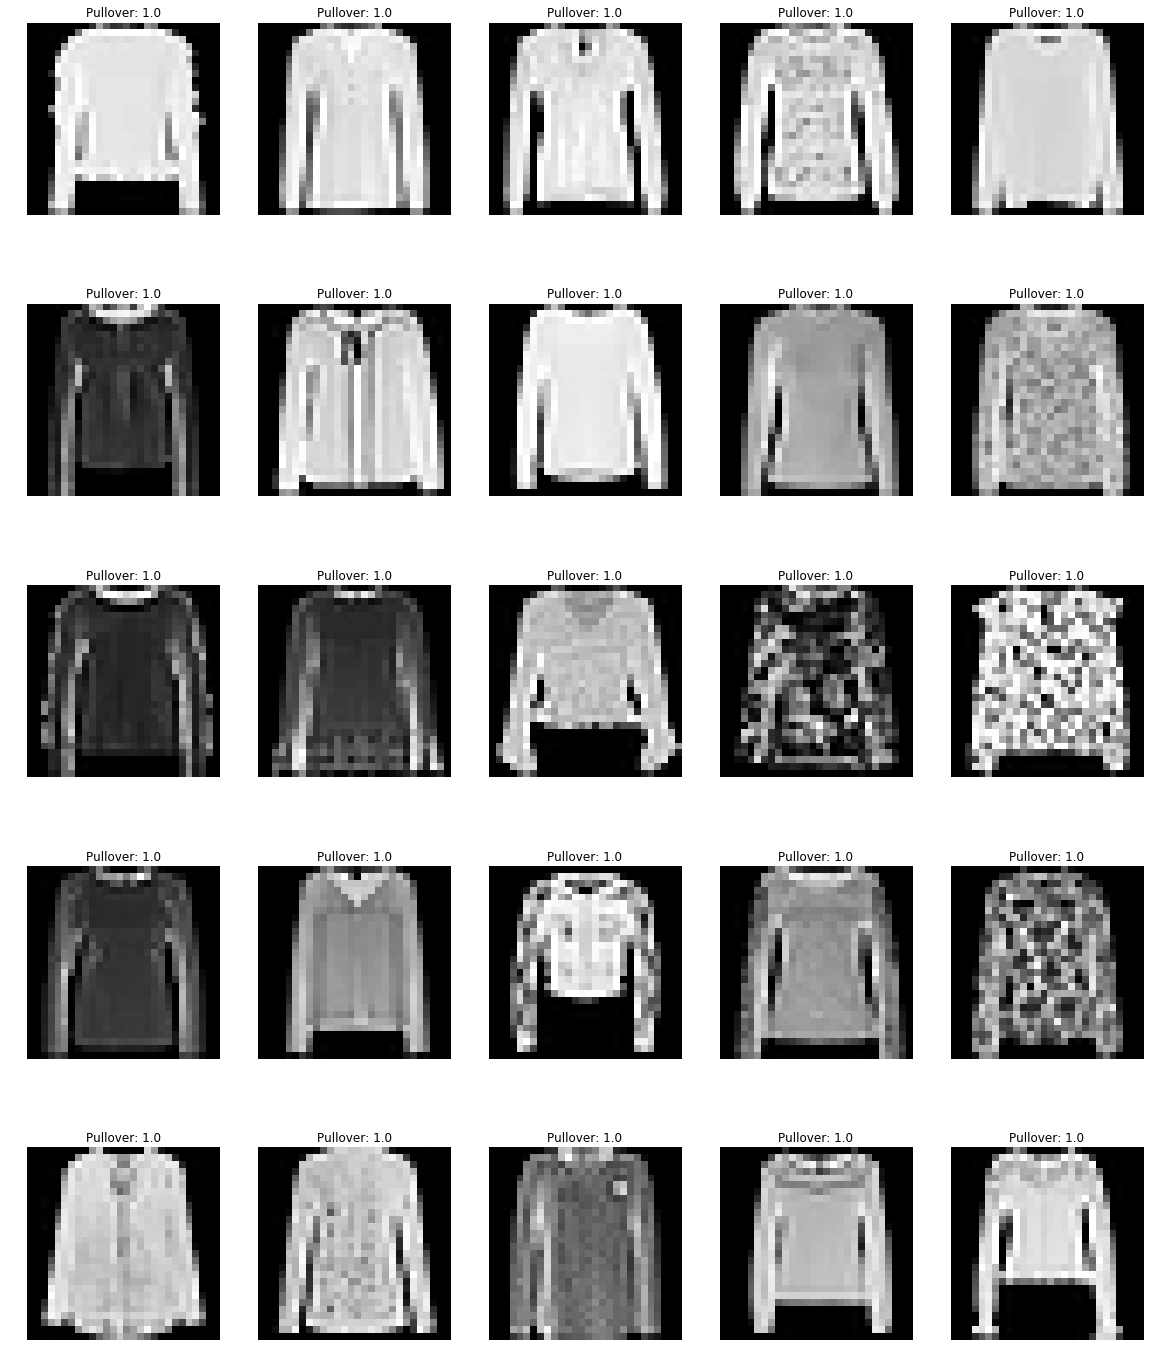

In [59]:
plot_df_examples(fp)

### Confusion Matrix

In [60]:
from image_processing_workshop.visual import plot_coocurance_matrix

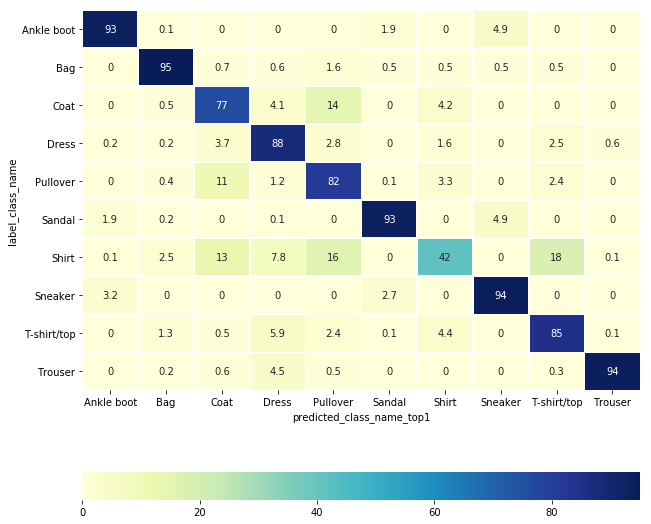

In [61]:
plot_coocurance_matrix(df, use_log=False)